In [25]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
hrdata = pd.read_csv("Employee Attrition & Performance.csv") 
hrdata.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
hrdata.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [20]:
len(hrdata)

1470

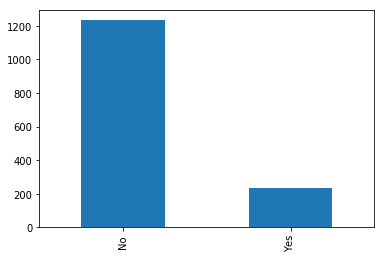

In [4]:
Att = hrdata['Attrition'].value_counts()
Att.plot(kind='bar')
title('Attrition Rates')

In [18]:
MS = hrdata['MaritalStatus'].value_counts()
MS

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [19]:
JR = hrdata['JobRole'].value_counts()
JR

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [53]:
D = hrdata['WorkLifeBalance'].value_counts()
D

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

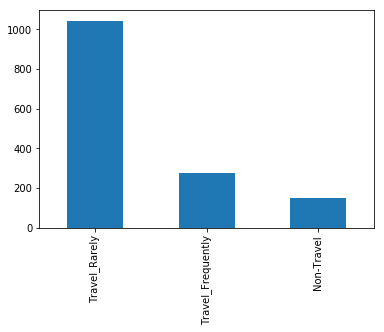

In [45]:
BT = hrdata['BusinessTravel'].value_counts()
BT.plot(kind='bar')

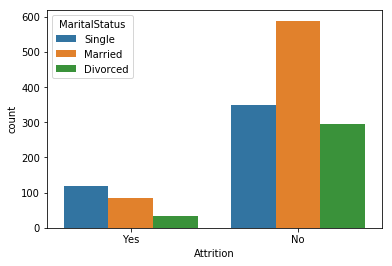

In [46]:
sb.countplot(x='Attrition', hue='MaritalStatus', data=hrdata)
title('Attrition based on Marital Status')
plt.show()
#Attrition is higher in employees who are single

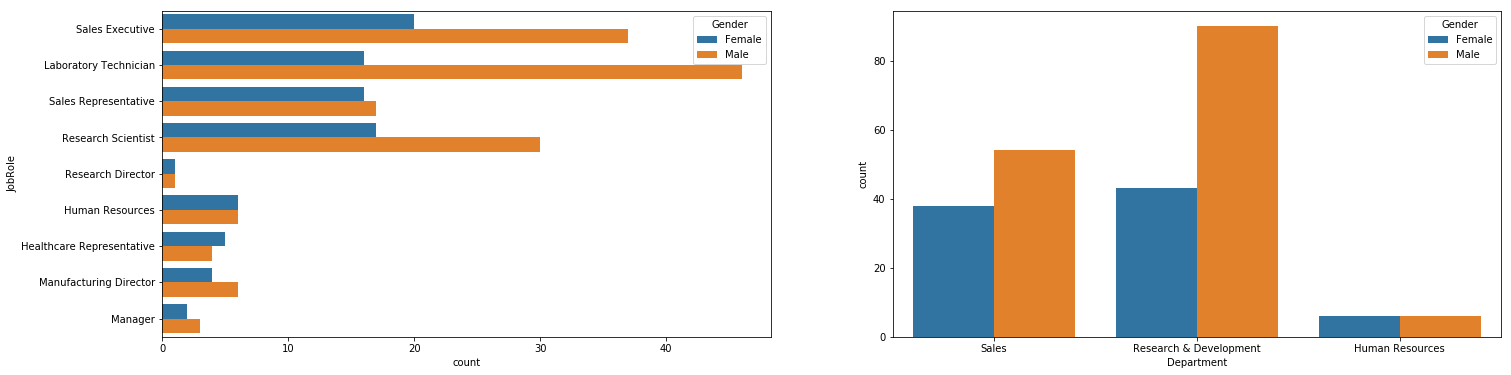

In [22]:
#Attrition across Job Roles
fig, ax1 = plt.subplots(1,2, figsize=(24,6))
sb.countplot(y='JobRole', hue='Gender', data = attr_yes, ax = ax1[0])
sb.countplot(x='Department', hue='Gender', data = attr_yes, ax = ax1[1])
plt.show()
#Attrition is higher in Sales and R&D Departments
#Attrition numbers are similar across gender in various departments

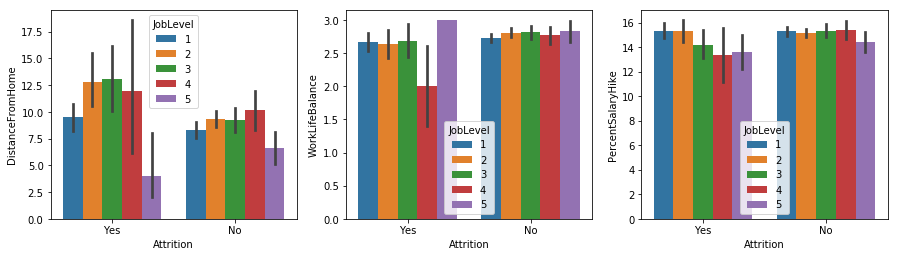

In [55]:
#Employee are more likely to quit , When DistanceFromHome is above 8KM and (Married people are higher in this case )
#For JobLevel 5, employees are more likely to quit if DistanceFromHome is between 2.5 and 5 km but the attrition rate falls if the distance is around 7km
#WorkLifeBalance should be between 2.5 and 3 on a 4 level scale to reduce the attrition rate
#PercentSalaryHike doesn't have a major impact on attrition rate


#JobLevel wise
columns = ["DistanceFromHome","WorkLifeBalance","PercentSalaryHike"]
plt.figure(figsize=(15,1))
j=0
for i in columns:
    j +=1
    plt.subplot(1,3,j)
    sb.barplot(x = 'Attrition', y = hrdata[i], hue="JobLevel", data =hrdata)
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

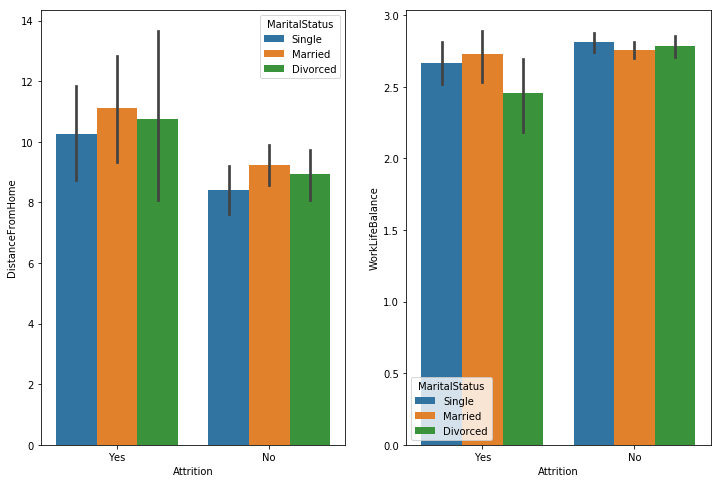

In [34]:
# MaritalStatus wise
columns = ["DistanceFromHome", "WorkLifeBalance"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = hrdata[i], hue="MaritalStatus", data =hrdata)
plt.show()



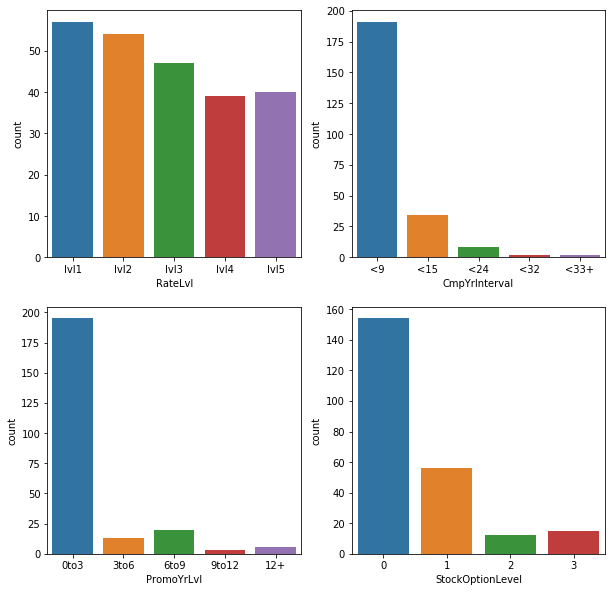

In [43]:
# Attrition count across Daily Rate, Years in company, Years since last promotion and level of stock options
hrdata['CmpYrInterval'] = pd.cut(hrdata['YearsAtCompany'], 5, labels=['<9', '<15', '<24', '<32', '<33+'])
hrdata['RateLvl'] = pd.cut(hrdata['DailyRate'], 5, labels=['lvl1', 'lvl2', 'lvl3', 'lvl4', 'lvl5'])
hrdata['PromoYrLvl'] = pd.cut(hrdata['YearsSinceLastPromotion'], 5, labels=['0to3', '3to6', '6to9', '9to12', '12+'])
attr_yes = hrdata[hrdata.Attrition=='Yes'] #subset with Attrition = Yes
attr_no = hrdata[hrdata.Attrition=='No'] ##subset with Attrition = No
fig, ax2 = plt.subplots(2,2, figsize=(10,10))
sb.countplot(x='RateLvl', data=attr_yes, ax = ax2[0,0])
sb.countplot(x='CmpYrInterval', data=attr_yes, ax = ax2[0,1])
sb.countplot(x='PromoYrLvl', data=attr_yes, ax = ax2[1,0])
sb.countplot(x='StockOptionLevel', data=attr_yes, ax = ax2[1,1])
plt.show()
#Attrition seems to be higher in the lower earning level
#Attrition seems to be more within employees who are associated with lesser number of years
#Attrition is high even for employees promoted in the past 3 years, hence this not be a factor
#Attrition seems to be higher with employees who do not have stock options